## Group Project Exploratory Notebook 2

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import os
import plotly.offline as po
import plotly.graph_objs as pg
from functools import reduce
from scipy.stats import zscore

Load Food Environment Atlas from usda. The Excel fiels comes with multiple spreadsheets with categories health, insecurity, socioeconomic, stores, local, and access. 

In [6]:
health = pd.read_excel('usda_health.xlsx')
insecurity = pd.read_excel('usda_insecurity.xlsx')
socioeconomic = pd.read_excel('usda_socioeconomic.xlsx')
stores = pd.read_excel('usda_stores.xlsx')
access = pd.read_excel('usda_access.xlsx')

Retain only the variables that we want for merging, building the index, and outcomes.

In [7]:
health_df = health[["FIPS", "State", "County", 
                 "PCT_DIABETES_ADULTS19", 
                "PCT_OBESE_ADULTS22"]]

In [8]:
insecurity_df = insecurity[["FIPS", "State", "County", 
                "FOODINSEC_18_20", "VLFOODSEC_18_20"]]

In [9]:
socio_df = socioeconomic[[
    "FIPS",
    "State",
    "County",
    "MEDHHINC21",
    "POVRATE21",
    "DEEPPOVRATE21",
    "CHILDPOVRATE21",
    "DEEPCHILDPOVRATE21",
    "PCT_65OLDER20"
]]

In [10]:
stores_df = stores[[
    "FIPS",
    "State",
    "County",
    "GROCPTH20",
    "SUPERCPTH20",
    "CONVSPTH20",
    "SPECSPTH20",
    "SNAPSPTH23",
    "WICSPTH22"
]]

In [11]:
access_df = access[['FIPS', 'State', 'County', 'PCT_LACCESS_POP19', 'PCT_LACCESS_LOWI19', 'PCT_LACCESS_HHNV19', 'PCT_LACCESS_SNAP19', 'PCT_LACCESS_CHILD19', 'PCT_LACCESS_SENIORS19']]


Combine the data frames

In [12]:
dfs = [health_df, insecurity_df, socio_df, stores_df, access_df]

In [13]:
df = reduce(lambda left, right: pd.merge(left, right, on=['FIPS', 'State', 'County'], how='left'), dfs)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3144 entries, 0 to 3143
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   FIPS                   3144 non-null   int64  
 1   State                  3144 non-null   object 
 2   County                 3144 non-null   object 
 3   PCT_DIABETES_ADULTS19  3144 non-null   float64
 4   PCT_OBESE_ADULTS22     3144 non-null   float64
 5   FOODINSEC_18_20        3143 non-null   float64
 6   VLFOODSEC_18_20        3143 non-null   float64
 7   MEDHHINC21             3144 non-null   int64  
 8   POVRATE21              3144 non-null   float64
 9   DEEPPOVRATE21          3144 non-null   float64
 10  CHILDPOVRATE21         3144 non-null   float64
 11  DEEPCHILDPOVRATE21     3144 non-null   float64
 12  PCT_65OLDER20          3144 non-null   float64
 13  GROCPTH20              3144 non-null   float64
 14  SUPERCPTH20            3144 non-null   float64
 15  CONV

Now rename the variables into something easier to understand.

In [30]:
rename = {
    "PCT_DIABETES_ADULTS19": "diabetes",
    "PCT_OBESE_ADULTS22": "obesity",
    "FOODINSEC_18_20": "food_insecurity",
    "VLFOODSEC_18_20": "very_low_food_security",
    "MEDHHINC21": "median_income",
    "POVRATE21": "poverty_rate",
    "DEEPPOVRATE21": "deep_poverty_rate",
    "CHILDPOVRATE21": "child_poverty_rate",
    "DEEPCHILDPOVRATE21": "deep_child_poverty_rate",
    "PCT_65OLDER20": "senior_population_pct",
    "GROCPTH20": "grocery_stores",
    "SUPERCPTH20": "supercenters",
    "CONVSPTH20": "convenience_stores",
    "SPECSPTH20": "specialty_stores",
    "SNAPSPTH23": "snap_stores",
    "WICSPTH22": "wic_stores",
    "PCT_LACCESS_POP19": "low_access_population_pct",
    "PCT_LACCESS_LOWI19": "low_income_low_access_pct",
    "PCT_LACCESS_HHNV19": "no_vehicle_low_access_pct",
    "PCT_LACCESS_SNAP19": "snap_low_access_pct",
    "PCT_LACCESS_CHILD19": "child_low_access_pct",
    "PCT_LACCESS_SENIORS19": "senior_low_access_pct"
}

df = df.rename(columns=rename)


In [16]:
df.describe()

,FIPS,PCT_DIABETES_ADULTS19,PCT_OBESE_ADULTS22,FOODINSEC_18_20,VLFOODSEC_18_20,MEDHHINC21,POVRATE21,DEEPPOVRATE21,CHILDPOVRATE21,DEEPCHILDPOVRATE21,...,CONVSPTH20,SPECSPTH20,SNAPSPTH23,WICSPTH22,PCT_LACCESS_POP19,PCT_LACCESS_LOWI19,PCT_LACCESS_HHNV19,PCT_LACCESS_SNAP19,PCT_LACCESS_CHILD19,PCT_LACCESS_SENIORS19
count,3144.000000,3144.000000,3144.000000,3143.000000,3143.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,...,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000
mean,30365.634542,-67.299491,32.385337,11.094337,4.357906,58898.131361,8.593257,3.475848,14.030057,5.923494,...,-905.522436,-6484.336227,-94.034353,-368.370915,15.177182,-0.750239,-6.058792,-1.287824,45.223799,47.312694
std,15174.497197,867.364108,159.173921,2.175232,0.913503,15359.949393,238.989659,158.658668,239.207467,158.780752,...,2870.374284,4774.377370,968.912228,1883.503846,299.106373,298.128727,297.887205,298.069401,431.994782,393.029272
min,1001.000000,-9999.000000,-8888.000000,5.700000,2.300000,-9999.000000,-9999.000000,-8888.000000,-9999.000000,-8888.000000,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
25%,18174.500000,7.500000,33.400000,9.700000,3.800000,49002.000000,10.600000,4.180778,13.800000,4.704577,...,0.353378,-9999.000000,0.757041,0.099514,11.885645,3.655029,1.607701,3.887837,51.857836,50.644032
50%,29174.000000,8.400000,35.500000,11.200000,4.400000,56629.000000,13.600000,5.675942,19.100000,7.510779,...,0.492827,-9999.000000,0.961609,0.146350,21.460513,6.687809,2.540787,6.693240,65.584377,64.099907
75%,45079.500000,9.600000,37.700000,12.600000,5.000000,65683.750000,17.525000,7.598638,24.800000,11.251141,...,0.666688,0.051036,1.219983,0.222748,32.370734,10.872572,3.880950,10.875478,77.585327,76.376297
max,56045.000000,17.600000,41.000000,15.300000,6.500000,153716.000000,43.900000,36.883771,58.500000,54.545455,...,4.441977,0.635324,11.011011,3.546099,100.000000,62.599918,54.574402,42.092457,100.000000,100.000000


There are -9999, -8888 values in places that don't make sense. When I looked around online it was said this can be used as a placeholder for missing data. I replaced them with NaN.

In [17]:
df.replace([-9999, -8888], np.nan, inplace=True)

In [18]:
df.describe()

,FIPS,PCT_DIABETES_ADULTS19,PCT_OBESE_ADULTS22,FOODINSEC_18_20,VLFOODSEC_18_20,MEDHHINC21,POVRATE21,DEEPPOVRATE21,CHILDPOVRATE21,DEEPCHILDPOVRATE21,...,CONVSPTH20,SPECSPTH20,SNAPSPTH23,WICSPTH22,PCT_LACCESS_POP19,PCT_LACCESS_LOWI19,PCT_LACCESS_HHNV19,PCT_LACCESS_SNAP19,PCT_LACCESS_CHILD19,PCT_LACCESS_SENIORS19
count,3144.000000,3120.000000,3143.000000,3143.000000,3143.000000,3142.000000,3142.000000,3143.000000,3142.000000,3143.000000,...,2859.000000,1105.000000,3114.000000,3028.000000,3141.000000,3141.000000,3141.000000,3141.000000,3138.000000,3139.000000
mean,30365.634542,8.742115,35.223513,11.094337,4.357906,58941.633355,14.609866,6.304825,20.050127,8.753250,...,0.574138,0.087695,1.032432,0.203053,24.388112,8.445479,3.131856,7.907381,64.074769,62.961169
std,15174.497197,1.619579,3.266036,2.175232,0.913503,15267.686038,5.663115,3.284716,8.413598,5.974650,...,0.278875,0.067549,0.444946,0.189634,18.603885,7.430106,2.974417,5.449930,19.520049,19.419987
min,1001.000000,4.100000,24.300000,5.700000,2.300000,25653.000000,2.900000,0.000000,2.800000,0.000000,...,0.129240,0.015244,0.188986,0.010869,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18174.500000,7.500000,33.400000,9.700000,3.800000,49016.250000,10.600000,4.181686,13.800000,4.707501,...,0.395288,0.049351,0.764106,0.104529,11.920097,3.669639,1.612652,3.893723,51.981799,50.669334
50%,29174.000000,8.400000,35.500000,11.200000,4.400000,56634.000000,13.600000,5.676209,19.100000,7.511262,...,0.521584,0.069428,0.966103,0.150190,21.463261,6.696394,2.541467,6.699671,65.646645,64.150803
75%,45079.500000,9.600000,37.700000,12.600000,5.000000,65687.250000,17.575000,7.599691,24.800000,11.252282,...,0.690926,0.103413,1.222158,0.227261,32.370937,10.882041,3.881178,10.875594,77.588366,76.396183
max,56045.000000,17.600000,41.000000,15.300000,6.500000,153716.000000,43.900000,36.883771,58.500000,54.545455,...,4.441977,0.635324,11.011011,3.546099,100.000000,62.599918,54.574402,42.092457,100.000000,100.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3144 entries, 0 to 3143
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   FIPS                   3144 non-null   int64  
 1   State                  3144 non-null   object 
 2   County                 3144 non-null   object 
 3   PCT_DIABETES_ADULTS19  3120 non-null   float64
 4   PCT_OBESE_ADULTS22     3143 non-null   float64
 5   FOODINSEC_18_20        3143 non-null   float64
 6   VLFOODSEC_18_20        3143 non-null   float64
 7   MEDHHINC21             3142 non-null   float64
 8   POVRATE21              3142 non-null   float64
 9   DEEPPOVRATE21          3143 non-null   float64
 10  CHILDPOVRATE21         3142 non-null   float64
 11  DEEPCHILDPOVRATE21     3143 non-null   float64
 12  PCT_65OLDER20          3143 non-null   float64
 13  GROCPTH20              2234 non-null   float64
 14  SUPERCPTH20            675 non-null    float64
 15  CONV

I chose to do mean imputation at the state level

In [23]:
impute = [c for c in df.columns if c not in ['FIPS', 'State', 'County'] and pd.api.types.is_numeric_dtype(df[c])]

In [24]:
df[impute] = df.groupby('State')[impute].transform(lambda x: x.fillna(x.mean()))

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3144 entries, 0 to 3143
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   FIPS                   3144 non-null   int64  
 1   State                  3144 non-null   object 
 2   County                 3144 non-null   object 
 3   PCT_DIABETES_ADULTS19  3123 non-null   float64
 4   PCT_OBESE_ADULTS22     3144 non-null   float64
 5   FOODINSEC_18_20        3144 non-null   float64
 6   VLFOODSEC_18_20        3144 non-null   float64
 7   MEDHHINC21             3144 non-null   float64
 8   POVRATE21              3144 non-null   float64
 9   DEEPPOVRATE21          3144 non-null   float64
 10  CHILDPOVRATE21         3144 non-null   float64
 11  DEEPCHILDPOVRATE21     3144 non-null   float64
 12  PCT_65OLDER20          3144 non-null   float64
 13  GROCPTH20              3144 non-null   float64
 14  SUPERCPTH20            3144 non-null   float64
 15  CONV

Sorry, I know this is redundant, but I decided to drop columns after deciding what to keep for the index. df_index becomes the new data frame

In [31]:
df_index = df[['FIPS', 'State', 'County',
               'diabetes', 'obesity',
               'poverty_rate', 'deep_poverty_rate', 'child_poverty_rate', 'median_income',
               'low_access_population_pct', 'low_income_low_access_pct', 'no_vehicle_low_access_pct',
               'child_low_access_pct', 'senior_low_access_pct',
                'supercenters', 'grocery_stores']].copy()

# Assistant
This error occurs because you're trying to access columns that don't exist in your DataFrame. The KeyError indicates that the columns listed in the error message are not present in your DataFrame.

To fix this error, you need to make sure you're only selecting columns that actually exist in your DataFrame. 

Would you like me to provide the corrected code?

## Create an index
Create the index with the following variables:

Variable,	Description
- FIPS,	County FIPS code identifying each county.
- State,	State name.
- County,	County name.
- diabetes,	Percentage of adults diagnosed with diabetes (2019).
- obesity,	Percentage of adults classified as obese (2022).
- poverty_rate,	Percentage of individuals living below the poverty line (2021).
- deep_poverty_rate,	Percentage of individuals living in deep poverty (2021).
- child_poverty_rate,	Percentage of children living below the poverty line (2021).
- median_income,	Median household income in dollars (2021).
- low_access_population_pct,	Percentage of total population with low access to grocery stores (2019).
- low_income_low_access_pct,	Percentage of low-income population with low access to grocery stores (2019).
- no_vehicle_low_access_pct,	Percentage of households without a vehicle and with low food access (2019).
- child_low_access_pct,	Percentage of children with low access to grocery stores (2019).
- senior_low_access_pct,	Percentage of seniors (65+) with low access to grocery stores (2019).
- supercenters,	Number of supercenters and warehouse clubs per 1,000 residents (2020).
- grocery_stores,	Number of grocery stores per 1,000 residents (2020).

Create the index. Start by inverting the variables where higher values would create better conditions for food access. Then standardize the selected variables by using z-score. Then compute the mean z-score across all variables to get the index.

In [32]:
invert_vars = ['median_income', 'low_access_population_pct', 'low_income_low_access_pct',
               'no_vehicle_low_access_pct', 'child_low_access_pct', 'senior_low_access_pct',
                'supercenters', 'grocery_stores']

for col in invert_vars:
    df_index[col + '_inv'] = -df_index[col]

index_vars = ['poverty_rate', 'deep_poverty_rate', 'child_poverty_rate'] + [col + '_inv' for col in invert_vars]

df_index['Food_Desert_Index'] = df_index[index_vars].apply(zscore).mean(axis=1)


In [33]:
df_index

,FIPS,State,County,diabetes,obesity,poverty_rate,deep_poverty_rate,child_poverty_rate,median_income,low_access_population_pct,...,grocery_stores,median_income_inv,low_access_population_pct_inv,low_income_low_access_pct_inv,no_vehicle_low_access_pct_inv,child_low_access_pct_inv,senior_low_access_pct_inv,supercenters_inv,grocery_stores_inv,Food_Desert_Index
0,1001,AL,Autauga,9.6,38.3,10.7,6.250216,16.1,66444.0,33.906700,...,0.071244,-66444.0,-33.906700,-13.020998,-4.121262,-68.239807,-67.076942,-0.032971,-0.071244,-0.221840
1,1003,AL,Baldwin,7.9,38.3,10.8,4.043401,16.4,65658.0,25.122238,...,0.126479,-65658.0,-25.122238,-7.936779,-2.262118,-73.113876,-71.405418,-0.039252,-0.126479,-0.247027
2,1005,AL,Barbour,11.3,38.3,23.0,12.826966,35.1,38649.0,20.520679,...,0.203343,-38649.0,-20.520679,-10.433171,-5.567524,-61.515743,-64.898987,-0.032971,-0.203343,0.551108
3,1007,AL,Bibb,10.2,38.3,20.6,9.076190,29.0,48454.0,1.593457,...,0.180701,-48454.0,-1.593457,-0.445866,-3.915879,-80.704353,-77.825546,-0.032971,-0.180701,0.411592
4,1009,AL,Blount,9.5,38.3,12.0,5.291223,16.7,56894.0,6.807624,...,0.069110,-56894.0,-6.807624,-2.512206,-3.487118,-89.143539,-84.313911,-0.032971,-0.069110,-0.060892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3139,56037,WY,Sweetwater,7.6,34.3,9.2,5.646027,9.7,74677.0,21.458797,...,0.117170,-74677.0,-21.458797,-5.226624,-1.718154,-52.902988,-64.694122,-0.044630,-0.117170,-0.209091
3140,56039,WY,Teton,4.2,34.3,5.9,2.547332,5.5,102709.0,17.425354,...,0.468145,-102709.0,-17.425354,-3.811752,-0.813935,-69.996643,-89.004349,-0.044630,-0.468145,-0.881783
3141,56041,WY,Uinta,7.3,34.3,9.4,3.508166,11.2,70162.0,3.438988,...,0.256731,-70162.0,-3.438988,-1.374147,-2.281521,-58.944565,-57.529495,-0.044630,-0.256731,-0.174892
3142,56043,WY,Washakie,8.8,34.3,10.2,2.607665,12.5,62176.0,12.390091,...,0.256731,-62176.0,-12.390091,-3.068048,-1.043336,-34.323338,-33.507191,-0.044630,-0.256731,0.075011


Now create a scale 1-5 for the food desert index

In [34]:
df_index['FDI_Category'] = pd.qcut(df_index['Food_Desert_Index'], 5, labels=[1, 2, 3, 4, 5])

In [35]:
df_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3144 entries, 0 to 3143
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   FIPS                           3144 non-null   int64   
 1   State                          3144 non-null   object  
 2   County                         3144 non-null   object  
 3   diabetes                       3123 non-null   float64 
 4   obesity                        3144 non-null   float64 
 5   poverty_rate                   3144 non-null   float64 
 6   deep_poverty_rate              3144 non-null   float64 
 7   child_poverty_rate             3144 non-null   float64 
 8   median_income                  3144 non-null   float64 
 9   low_access_population_pct      3144 non-null   float64 
 10  low_income_low_access_pct      3144 non-null   float64 
 11  no_vehicle_low_access_pct      3144 non-null   float64 
 12  child_low_access_pct           314

In [36]:
df_index.describe()

,FIPS,diabetes,obesity,poverty_rate,deep_poverty_rate,child_poverty_rate,median_income,low_access_population_pct,low_income_low_access_pct,no_vehicle_low_access_pct,...,grocery_stores,median_income_inv,low_access_population_pct_inv,low_income_low_access_pct_inv,no_vehicle_low_access_pct_inv,child_low_access_pct_inv,senior_low_access_pct_inv,supercenters_inv,grocery_stores_inv,Food_Desert_Index
count,3144.000000,3123.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,...,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3.144000e+03
mean,30365.634542,8.741866,35.222519,14.608707,6.304770,20.047669,58951.202863,24.400658,8.450682,3.144447,...,0.233903,-58951.202863,-24.400658,-8.450682,-3.144447,-64.071208,-62.959483,-0.034119,-0.233903,6.101989e-17
std,15174.497197,1.618820,3.265992,5.661551,3.284195,8.411568,15267.806593,18.599437,7.428468,3.000790,...,0.165862,15267.806593,18.599437,7.428468,3.000790,19.502449,19.404603,0.009235,0.165862,4.316674e-01
min,1001.000000,4.100000,24.300000,2.900000,0.000000,2.800000,25653.000000,0.000000,0.000000,0.000000,...,0.037616,-153716.000000,-100.000000,-62.599918,-54.574402,-100.000000,-100.000000,-0.180072,-2.335357,-2.988112e+00
25%,18174.500000,7.500000,33.400000,10.600000,4.181742,13.800000,49020.750000,11.936153,3.671291,1.612818,...,0.150414,-65694.000000,-32.388653,-10.903113,-3.889596,-77.585327,-76.376297,-0.039363,-0.263999,-2.111456e-01
50%,29174.000000,8.400000,35.500000,13.600000,5.677784,19.100000,56640.500000,21.468740,6.699604,2.543299,...,0.192947,-56640.500000,-21.468740,-6.699604,-2.543299,-65.595440,-64.099907,-0.033511,-0.192947,1.824329e-02
75%,45079.500000,9.600000,37.700000,17.525000,7.598638,24.800000,65694.000000,32.388653,10.903113,3.889596,...,0.263999,-49020.750000,-11.936153,-3.671291,-1.612818,-52.003406,-50.673424,-0.028132,-0.150414,2.502951e-01
max,56045.000000,17.600000,41.000000,43.900000,36.883771,58.500000,153716.000000,100.000000,62.599918,54.574402,...,2.335357,-25653.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.003748,-0.037616,1.593891e+00


# Modeling 

## Distributions

I'll take a look at the distributions for all variables.

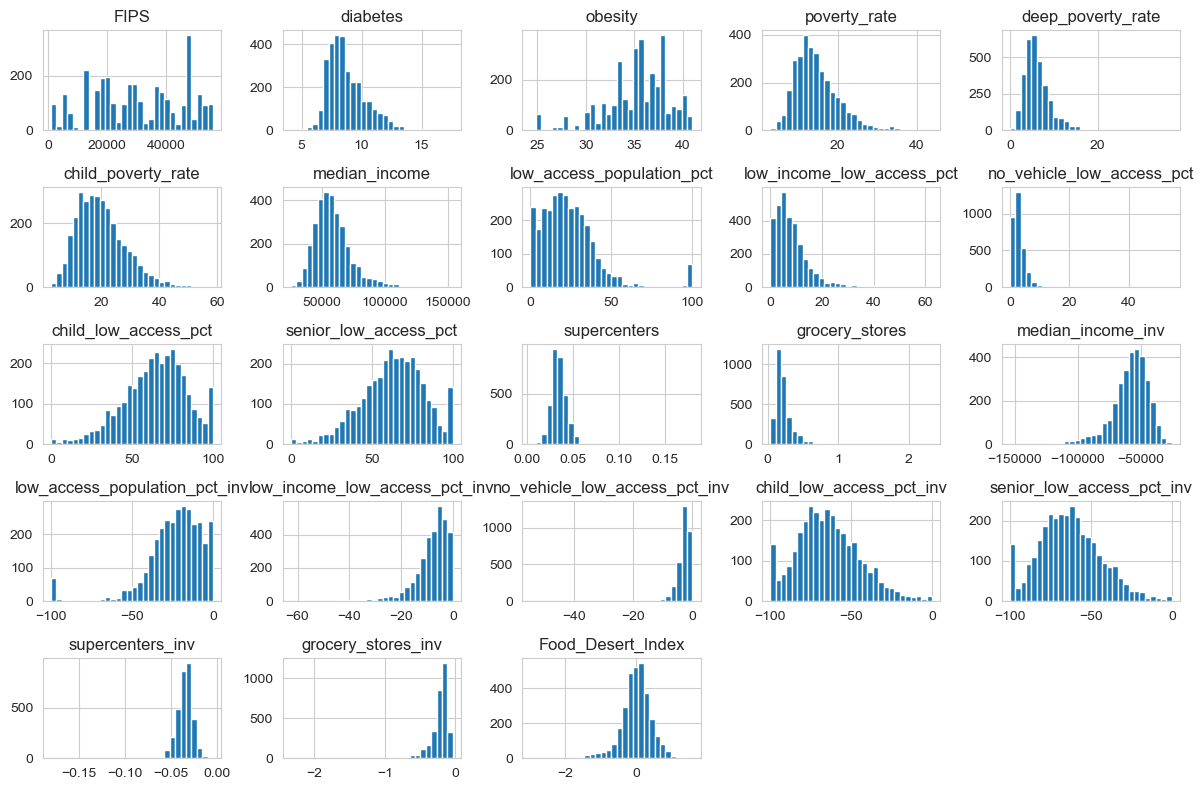

In [41]:
df_index.hist(figsize=(12, 8), bins=30); plt.xticks(rotation=45, ha='right', fontsize=8); plt.tight_layout()


I observe that variables such as ```poverty-rate```, ```low_income_low_access_pct```, ```grocery_stores```, and ```supercenters``` all have long right tails.

Variables like ```diabetes```, ```obesity```, and ```median_income``` are relatively normal. 

Potential outliers in ```supercenters``` and ```grocery_stores```.

## Single Input Models

Check correlation

In [47]:
numeric_columns = df_index.select_dtypes(include=['number'])
correlation = numeric_columns.corr()['Food_Desert_Index'].sort_values(ascending=False)

In [48]:
correlation

Food_Desert_Index                1.000000
low_access_population_pct_inv    0.586034
poverty_rate                     0.548742
deep_poverty_rate                0.517022
child_poverty_rate               0.510823
child_low_access_pct_inv         0.493562
senior_low_access_pct_inv        0.465512
low_income_low_access_pct_inv    0.405220
median_income_inv                0.395567
grocery_stores_inv               0.338328
supercenters_inv                 0.317961
diabetes                         0.311336
no_vehicle_low_access_pct_inv    0.168814
obesity                          0.113969
FIPS                            -0.017975
no_vehicle_low_access_pct       -0.168814
supercenters                    -0.317961
grocery_stores                  -0.338328
median_income                   -0.395567
low_income_low_access_pct       -0.405220
senior_low_access_pct           -0.465512
child_low_access_pct            -0.493562
low_access_population_pct       -0.586034
Name: Food_Desert_Index, dtype: fl

Most variables have a positive correlation with Food Desert Index. I see ```low_access_population_pct_inv```, ```poverty_rate```, ```deep_poverty_rate```, and ```child_poverty_rate``` as highest positive correlation with Food Desert index, and ```low_access_population_pct```, ```child_low_access_pct```, and ```senior_low_access_pct``` as highest negative correlations.

Plot strongest positive correlations

<Axes: xlabel='low_access_population_pct_inv', ylabel='Food_Desert_Index'>

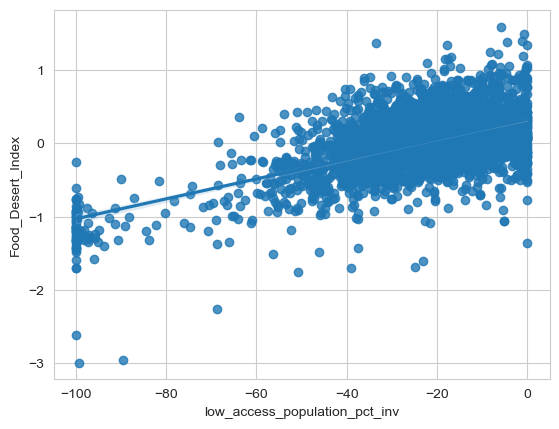

In [53]:
sns.regplot(x='low_access_population_pct_inv', y='Food_Desert_Index', data=df_index)

<Axes: xlabel='poverty_rate', ylabel='Food_Desert_Index'>

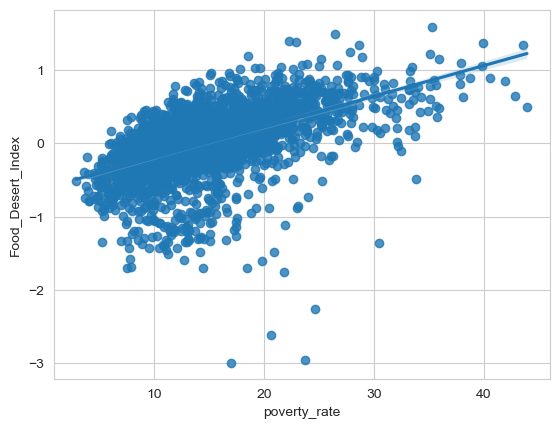

In [54]:
sns.regplot(x='poverty_rate', y='Food_Desert_Index', data=df_index)

<Axes: xlabel='deep_poverty_rate', ylabel='Food_Desert_Index'>

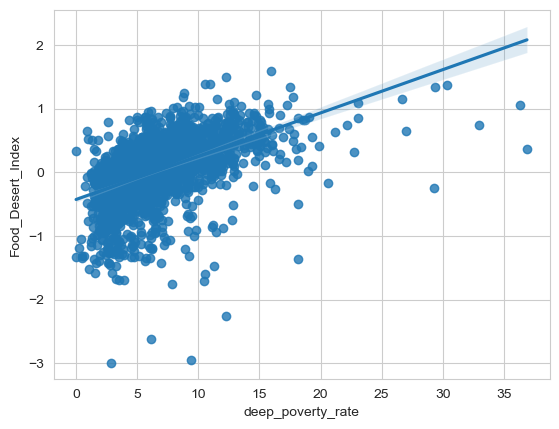

In [55]:
sns.regplot(x='deep_poverty_rate', y='Food_Desert_Index', data=df_index)

Plot strongest negative correlations

<Axes: xlabel='low_access_population_pct', ylabel='Food_Desert_Index'>

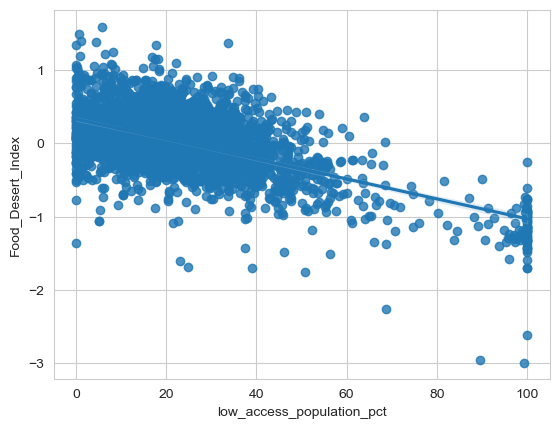

In [56]:
sns.regplot(x='low_access_population_pct', y='Food_Desert_Index', data=df_index)

<Axes: xlabel='child_low_access_pct', ylabel='Food_Desert_Index'>

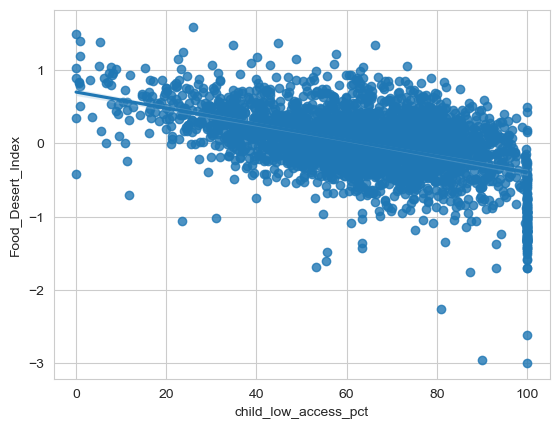

In [57]:
sns.regplot(x='child_low_access_pct', y='Food_Desert_Index', data=df_index)

<Axes: xlabel='senior_low_access_pct', ylabel='Food_Desert_Index'>

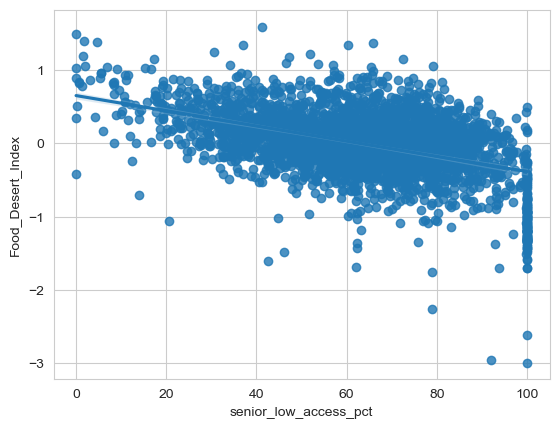

In [58]:
sns.regplot(x='senior_low_access_pct', y='Food_Desert_Index', data=df_index)